<a href="https://colab.research.google.com/github/ashiq-056/Clustering/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data (4).xlsx


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import queue
import collections
import scipy.io as spio
#from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel("data.xlsx")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,39
1,2,Male,0.057692,0.000000,81
2,3,Female,0.038462,0.008197,6
3,4,Female,0.096154,0.008197,77
4,5,Female,0.250000,0.016393,40
...,...,...,...,...,...
195,196,Female,0.326923,0.860656,79
196,197,Female,0.519231,0.909836,28
197,198,Male,0.269231,0.909836,74
198,199,Male,0.269231,1.000000,18


In [ ]:
T = []
l = list(df['Gender'])
for i in l:
  if i == 'Male':
    T.append(True)
  else:
    T.append(False)

In [ ]:
colors = {True: 'red', False: 'green'}
T_col = [colors[i] for i in T]

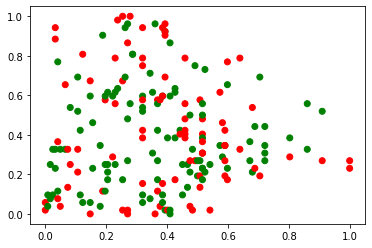

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Age'], c=T_col)

In [ ]:
data = df[['Age', 'Annual Income (k$)']].iloc[: , :].values

In [ ]:
noise = 0
core = -1
boundary = -2 

In [ ]:
def neighbour_points(data, point, rad):
  points = []
  for i in range(len(data)):
    if np.linalg.norm(data[i] - data[point]) <= rad:
      points.append(i)
  return points

In [ ]:
def dbscan(data, Eps, minPt):
  point_label = [0] * len(data)
  neighbour_point = []
  corepoint = []
  noncore = []

  for i in range(len(data)):
    neighbour_point.append(neighbour_points(data, i, Eps))

  for i in range(len(neighbour_point)):
    if(len(neighbour_point[i]) >= minPt):
      point_label[i] = core
      corepoint.append(i)
    else:
      noncore.append(i)
  
  for i in noncore:
    for j in neighbour_point[i]:
      if j in corepoint:
        point_label[i] = boundary
        break

  c = 1
  for i in range(len(point_label)):
    q = queue.Queue()
    if (point_label[i] == core):
      point_label[i] = c
      for x in neighbour_point[i]:
        if (point_label[x] == core):
          q.put(x)
          point_label[x] = c
        elif (point_label[x] == boundary):
          point_label[x]=c
      
      while not q.empty():
        neighbours = neighbour_point[q.get()]
        for y in neighbours:
          if (point_label[y] == core):
            point_label[y] = c
            q.put(y)
          if (point_label[y] == boundary):
            point_label[y] = c
      c = c+1
  return point_label,c
  

In [ ]:
def plot(data, label, n_clust):
  nPoints = len(data)
  Colors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']

  for i in range(n_clust):
    if (i == 0):
      color = 'blue'
    else:
      color = colors[i % len(colors)]

    x1 = []
    y1 = []
    for j in range(nPoints):
      if label[j] == i:
        x1.append(data[j, 0])
        y1.append(data[j, 1])
    plt.scatter(x1,y1,c=color, alpha=1, marker='o')

In [ ]:
eps = 0.1
minpts = 5

In [ ]:
predlabel,c = dbscan(data,eps,minpts)

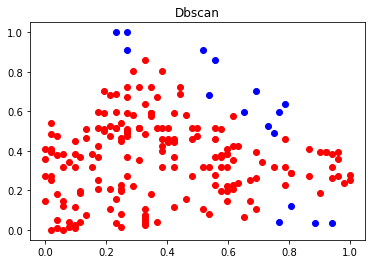

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.title('Dbscan')
plot(data, predlabel, c)
plt.show()
from google.colab import files
plt.savefig("clustered2.png")
files.download("clustered2.png")

In [ ]:
silhouette = silhouette_score(data, predlabel)
silhouette

0.24531042198730602

In [ ]:
ari = adjusted_rand_score(T, predlabel)
ari

0.008075088635866503

In [ ]:
nmi = normalized_mutual_info_score(T, predlabel)
nmi

0.0054418046646868634